### Predictive Analytics: Part 1 - Working with data

- loading a dataset
- exploring a dataset
[I'm an inline-style link](https://www.google.com)

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Loading a CSV file

In [51]:
music = pd.read_csv('../Data_Visualization/Data/top10s.csv',encoding="utf8")

### Install a library in Jupyter

In [13]:
# !pip install seaborn

### Exploring the dataset

In [52]:
music

,title,artist,topgenre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
599,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
600,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
601,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


### Skewness and Kurtosis 

In [53]:
music.skew()

year     -0.185988
bpm       0.537042
nrgy     -0.985194
dnce     -0.679595
dB      -12.449699
live      1.716040
val      -0.073908
dur       1.339546
acous     2.202629
spch      2.540666
pop      -1.427679
dtype: float64

In [55]:
# music.kurtosis()

### Normal distribution of columns

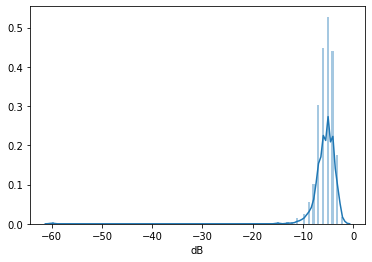

In [56]:
import math

# Negative skew
sns.distplot(music['dB'], bins='auto');

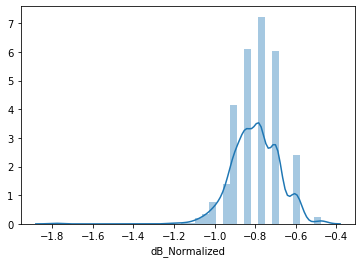

In [62]:
# Normalize the column

# Z-score
# music['dB_n']=(music['dB']-music['dB'].mean())/music['dB'].std()

# Min Max Normalization
# music['dB_n2']=(music['dB']-music['dB'].min())/(music['dB'].max()-music['dB'].min())
music['dB_Normalized']=music.apply(lambda x: np.sign(x['dB'])* math.log10(1+ abs(x['dB'])), axis=1)
sns.distplot(music['dB_Normalized'], bins='auto');

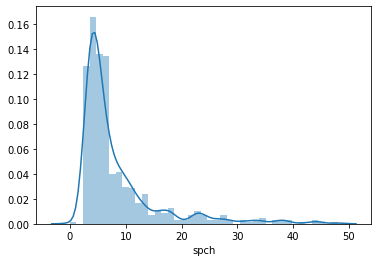

In [58]:
# Positive skew
# music=music[music['spch']>0]
sns.distplot(music['spch'], bins='auto');

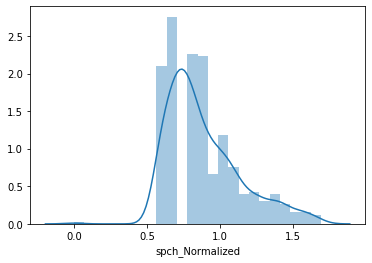

In [59]:
# Normalize the column

# music['spch_Normalized1']=(music['spch']-music['spch'].mean())/music['spch'].std()
# music['spch_Normalized2']=(music['spch']-music['spch'].min())/(music['spch'].max()-music['spch'].min())
music['spch_Normalized']=music.apply(lambda x: math.log10(1+ abs(x['spch'])), axis=1)
sns.distplot(music['spch_Normalized'], bins='auto');

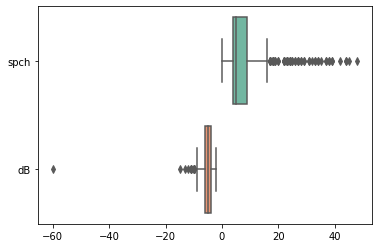

In [21]:
sns.boxplot(data=music[['spch','dB']],orient="h", palette="Set2")

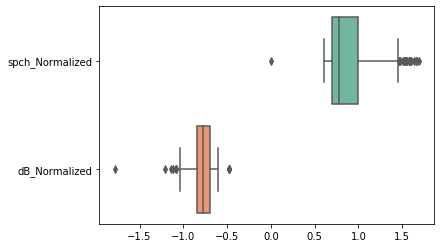

In [22]:
sns.boxplot(data=music[['spch_Normalized','dB_Normalized']],orient="h", palette="Set2")

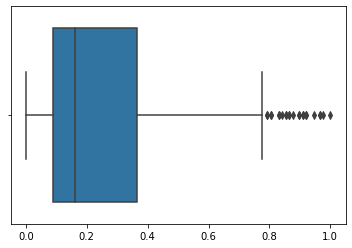

In [63]:
from sklearn import preprocessing

#Create x, where x the 'scores' column's values as floats
spch = music_refined[['spch_Normalized']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(spch)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
sns.boxplot(df_normalized)

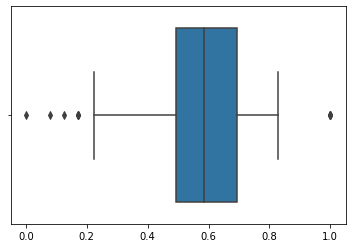

In [64]:
#Create x, where x the 'scores' column's values as floats
dB = music_refined[['dB_Normalized']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(dB)

# Run the normalizer on the dataframe
df_normalized = pd.DataFrame(x_scaled)
sns.boxplot(df_normalized)

### Normalization and Scaling using SKlearn

In [65]:
import pandas as pd
from sklearn import preprocessing

data = music[['spch','dB','val','bpm','nrgy','dnce','live','dur','acous','pop']]
cols = data.columns
df = pd.DataFrame(data)
df

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(df)
df_normalized = pd.DataFrame(np_scaled, columns = cols)
df_normalized


,spch,dB,val,bpm,nrgy,dnce,live,dur,acous,pop
0,0.083333,0.965517,0.816327,0.470874,0.908163,0.690722,0.108108,0.286207,0.191919,0.838384
1,0.479167,0.948276,0.653061,0.422330,0.948980,0.773196,0.702703,0.444828,0.242424,0.828283
2,0.291667,0.982759,0.724490,0.582524,0.857143,0.783505,0.391892,0.227586,0.101010,0.808081
3,0.083333,0.965517,0.724490,0.577670,0.938776,0.721649,0.108108,0.555172,0.000000,0.797980
4,0.083333,0.948276,0.438776,0.529126,0.857143,0.659794,0.121622,0.300000,0.020202,0.787879
...,...,...,...,...,...,...,...,...,...,...
598,0.062500,0.913793,0.163265,0.504854,0.673469,0.628866,0.270270,0.144828,0.010101,0.757576
599,0.250000,0.931034,0.622449,0.461165,0.806122,0.773196,0.094595,0.248276,0.212121,0.757576
600,0.708333,0.948276,0.663265,0.660194,0.775510,0.546392,0.121622,0.434483,0.070707,0.707071
601,0.145833,0.931034,0.244898,0.553398,0.806122,0.618557,0.567568,0.286207,0.010101,0.696970


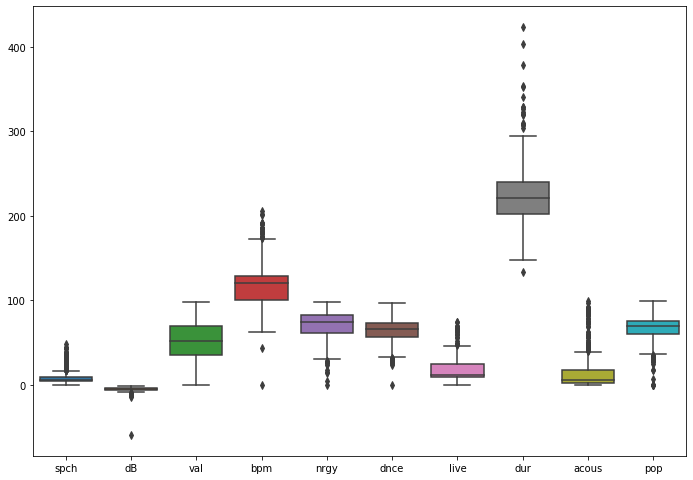

In [30]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=data)

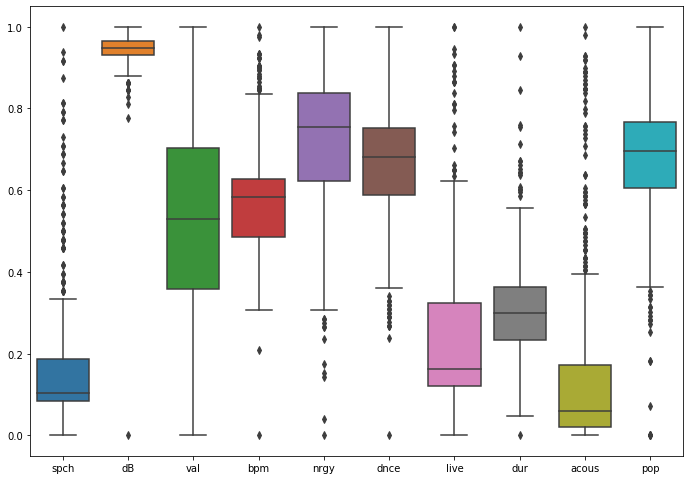

In [31]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.boxplot(data=df_normalized)

In [32]:
# sns.distplot(music['spch'], bins='auto');
from scipy import stats

field=music['spch_Normalized']
#mean value
mean= np.mean(field)

#median value
median = np.median(field)

#mode value
mode= stats.mode(field)

print("Mean: ", mean)
print("Median: ", median)
print("Mode: ", mode)

Mean:  0.8841207836378376
Median:  0.7781512503836436
Mode:  ModeResult(mode=array([0.69897]), count=array([117]))


#### Scalling using Sklearn

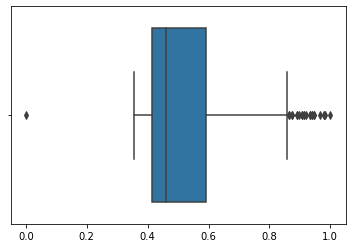

In [33]:
from sklearn.preprocessing import MinMaxScaler
from pandas import Series

series = Series(music['spch_Normalized'])

# prepare data for normalization
values = series.values
values = values.reshape((len(values), 1))

# train the normalization
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
# print('Min: %f, Max: %f' % (scaler.data_min_, scaler.data_max_))

# normalize the dataset and print
normalized = scaler.transform(values)
# print(normalized)
sns.boxplot(normalized)

#### If Data Is Gaussian, Use Parametric Statistical Methods, Else: Use Nonparametric Statistical Methods. 

### Quantile-Quantile Plot
Another popular plot for checking the distribution of a data sample is the quantile-quantile plot, Q-Q plot, or QQ plot for short.

This plot generates its own sample of the idealized distribution that we are comparing with, in this case the Gaussian distribution. The idealized samples are divided into groups (e.g. 5), called quantiles. Each data point in the sample is paired with a similar member from the idealized distribution at the same cumulative distribution.

The resulting points are plotted as a scatter plot with the idealized value on the x-axis and the data sample on the y-axis.

A perfect match for the distribution will be shown by a line of dots on a 45-degree angle from the bottom left of the plot to the top right. Often a line is drawn on the plot to help make this expectation clear. Deviations by the dots from the line shows a deviation from the expected distribution.



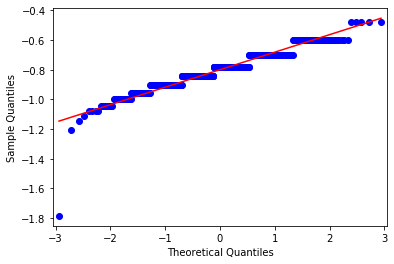

In [36]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot
# seed the random number generator
seed(1)
# generate univariate observations
# q-q plot

spch = music['dB_Normalized']
spch_df=spch.reset_index()
# spch_df=spch_df
# qqplot(spch_df['spch_Normalized'], line='s')
qqplot(spch, line='s')

pyplot.show()

### Statistical Normality Tests
https://machinelearningmastery.com/a-gentle-introduction-to-normality-tests-in-python/

There are many statistical tests that we can use to quantify whether a sample of data looks as though it was drawn from a Gaussian distribution. Each test makes different assumptions and considers different aspects of the data.We will look at 3 commonly used tests in this section that you can apply to your own data samples.Each test will return at least two things:
- Statistic: A quantity calculated by the test that can be interpreted in the context of the test via comparing it to critical values from the distribution of the test statistic.

- p-value: Used to interpret the test, in this case whether the sample was drawn from a Gaussian distribution.
Each test calculates a test-specific statistic. This statistic can aid in the interpretation of the result, although it may require a deeper proficiency with statistics and a deeper knowledge of the specific statistical test. I
The tests assume that that the sample was drawn from a Gaussian distribution. Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, typically 5% (or 0.05), that is used to interpret the p-value. In the SciPy implementation of these tests, you can interpret the p value as follows.

- p <= alpha: reject H0, not normal.
- p > alpha: fail to reject H0, normal.
This means that, in general, we are seeking results with a larger p-value to confirm that our sample was likely drawn from a Gaussian distribution. A result above 5% does not mean that the null hypothesis is true. It means that it is very likely true given available evidence. The p-value is not the probability of the data fitting a Gaussian distribution; it can be thought of as a value that helps us interpret the statistical test.

### Shapiro-Wilk Test
The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.



In [44]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
seed(1)
data = 5 * randn(100) + 50

# normality test
stat, p = shapiro(music['dB'])
# stat, p = shapiro(music['dB_Normalized'])
print('Statistics=%.3f, p=%.3f' % (stat, p))


Statistics=0.469, p=0.000


### Create dummy variables

In [69]:
# Create a dummy variable using One-Hot approach
music_dummy = music[music['topgenre'].str.contains('pop')]
music_dummy_columns = music_dummy [['year','topgenre']]
# use pd.concat to join the new columns with your original dataframe
df = pd.concat([music_dummy['year'],pd.get_dummies(music_dummy['topgenre'], prefix='genre')],axis=1)
# df.drop(['topgenre'],axis=1, inplace=True)
display(df)


,year,genre_acoustic pop,genre_art pop,genre_australian pop,genre_barbadian pop,genre_baroque pop,genre_canadian pop,genre_candy pop,genre_colombian pop,genre_dance pop,genre_danish pop,genre_electropop,genre_folk-pop,genre_french indie pop,genre_hip pop,genre_indie pop,genre_metropopolis,genre_moroccan pop,genre_pop
2,2010,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,2010,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,2010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,2010,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
599,2019,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
600,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
601,2019,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [46]:
# Categorical count
music['topgenre'].value_counts()
percent100 = music['topgenre'].value_counts(normalize=True).mul(100).round(1).astype(str) 
top_genre=pd.DataFrame({'counts': music['topgenre'].value_counts(), 'per100': percent100}).head(5)
top_genre

,counts,per100
dance pop,327,54.2
pop,60,10.0
canadian pop,34,5.6
barbadian pop,15,2.5
boy band,15,2.5
